<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Lab 4.2.1: Feature Selection

### 1. Load & Explore Data

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### 1.1 Load Data

In [85]:
# Read CSV
wine = pd.read_csv('winequality_merged.csv')

#### 1.2 Explore Data (Exploratory Data Analysis)

In [86]:
# ANSWER
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


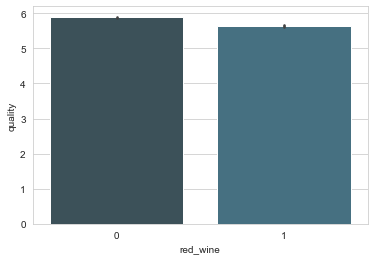

In [87]:
sns.barplot(x='red_wine',y='quality',data=wine);

In [88]:
#Drop the column red_wine.
wine.drop(columns='red_wine',inplace=True)


In [89]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


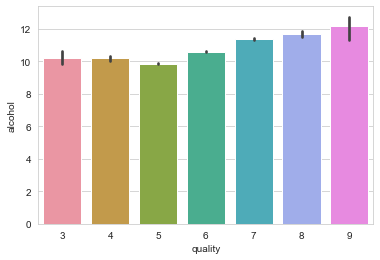

In [90]:
sns.barplot(x='quality',y='alcohol',data=wine,);
#wine['quality'].value_counts()

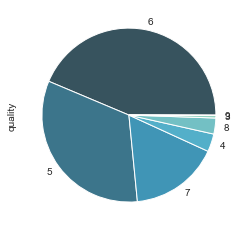

In [91]:
wine['quality'].value_counts().plot(kind='pie');

In [92]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [93]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [94]:
wine.shape

(6497, 12)

In [95]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


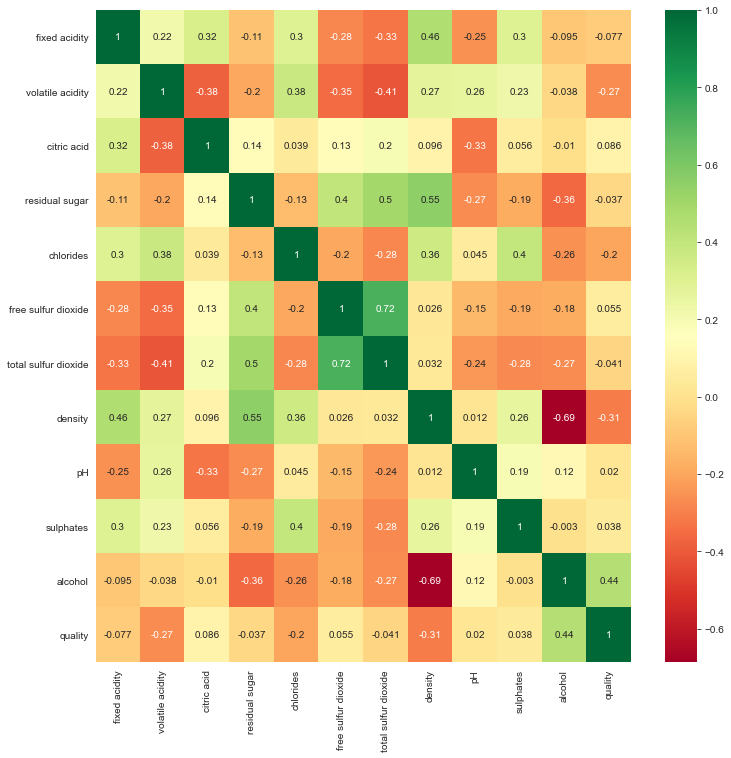

In [96]:
corrmat=wine.corr()
top_corr_features=corrmat.index 
plt.figure(figsize=(12,12))
#plot heat map 
g=sns.heatmap(wine[top_corr_features].corr(),annot=True,cmap="RdYlGn")

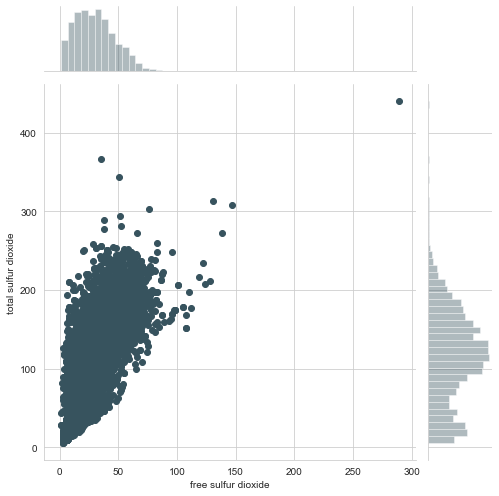

In [97]:
sns.jointplot(data=wine,x='free sulfur dioxide',y='total sulfur dioxide',kind='scatter',height=7 )
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

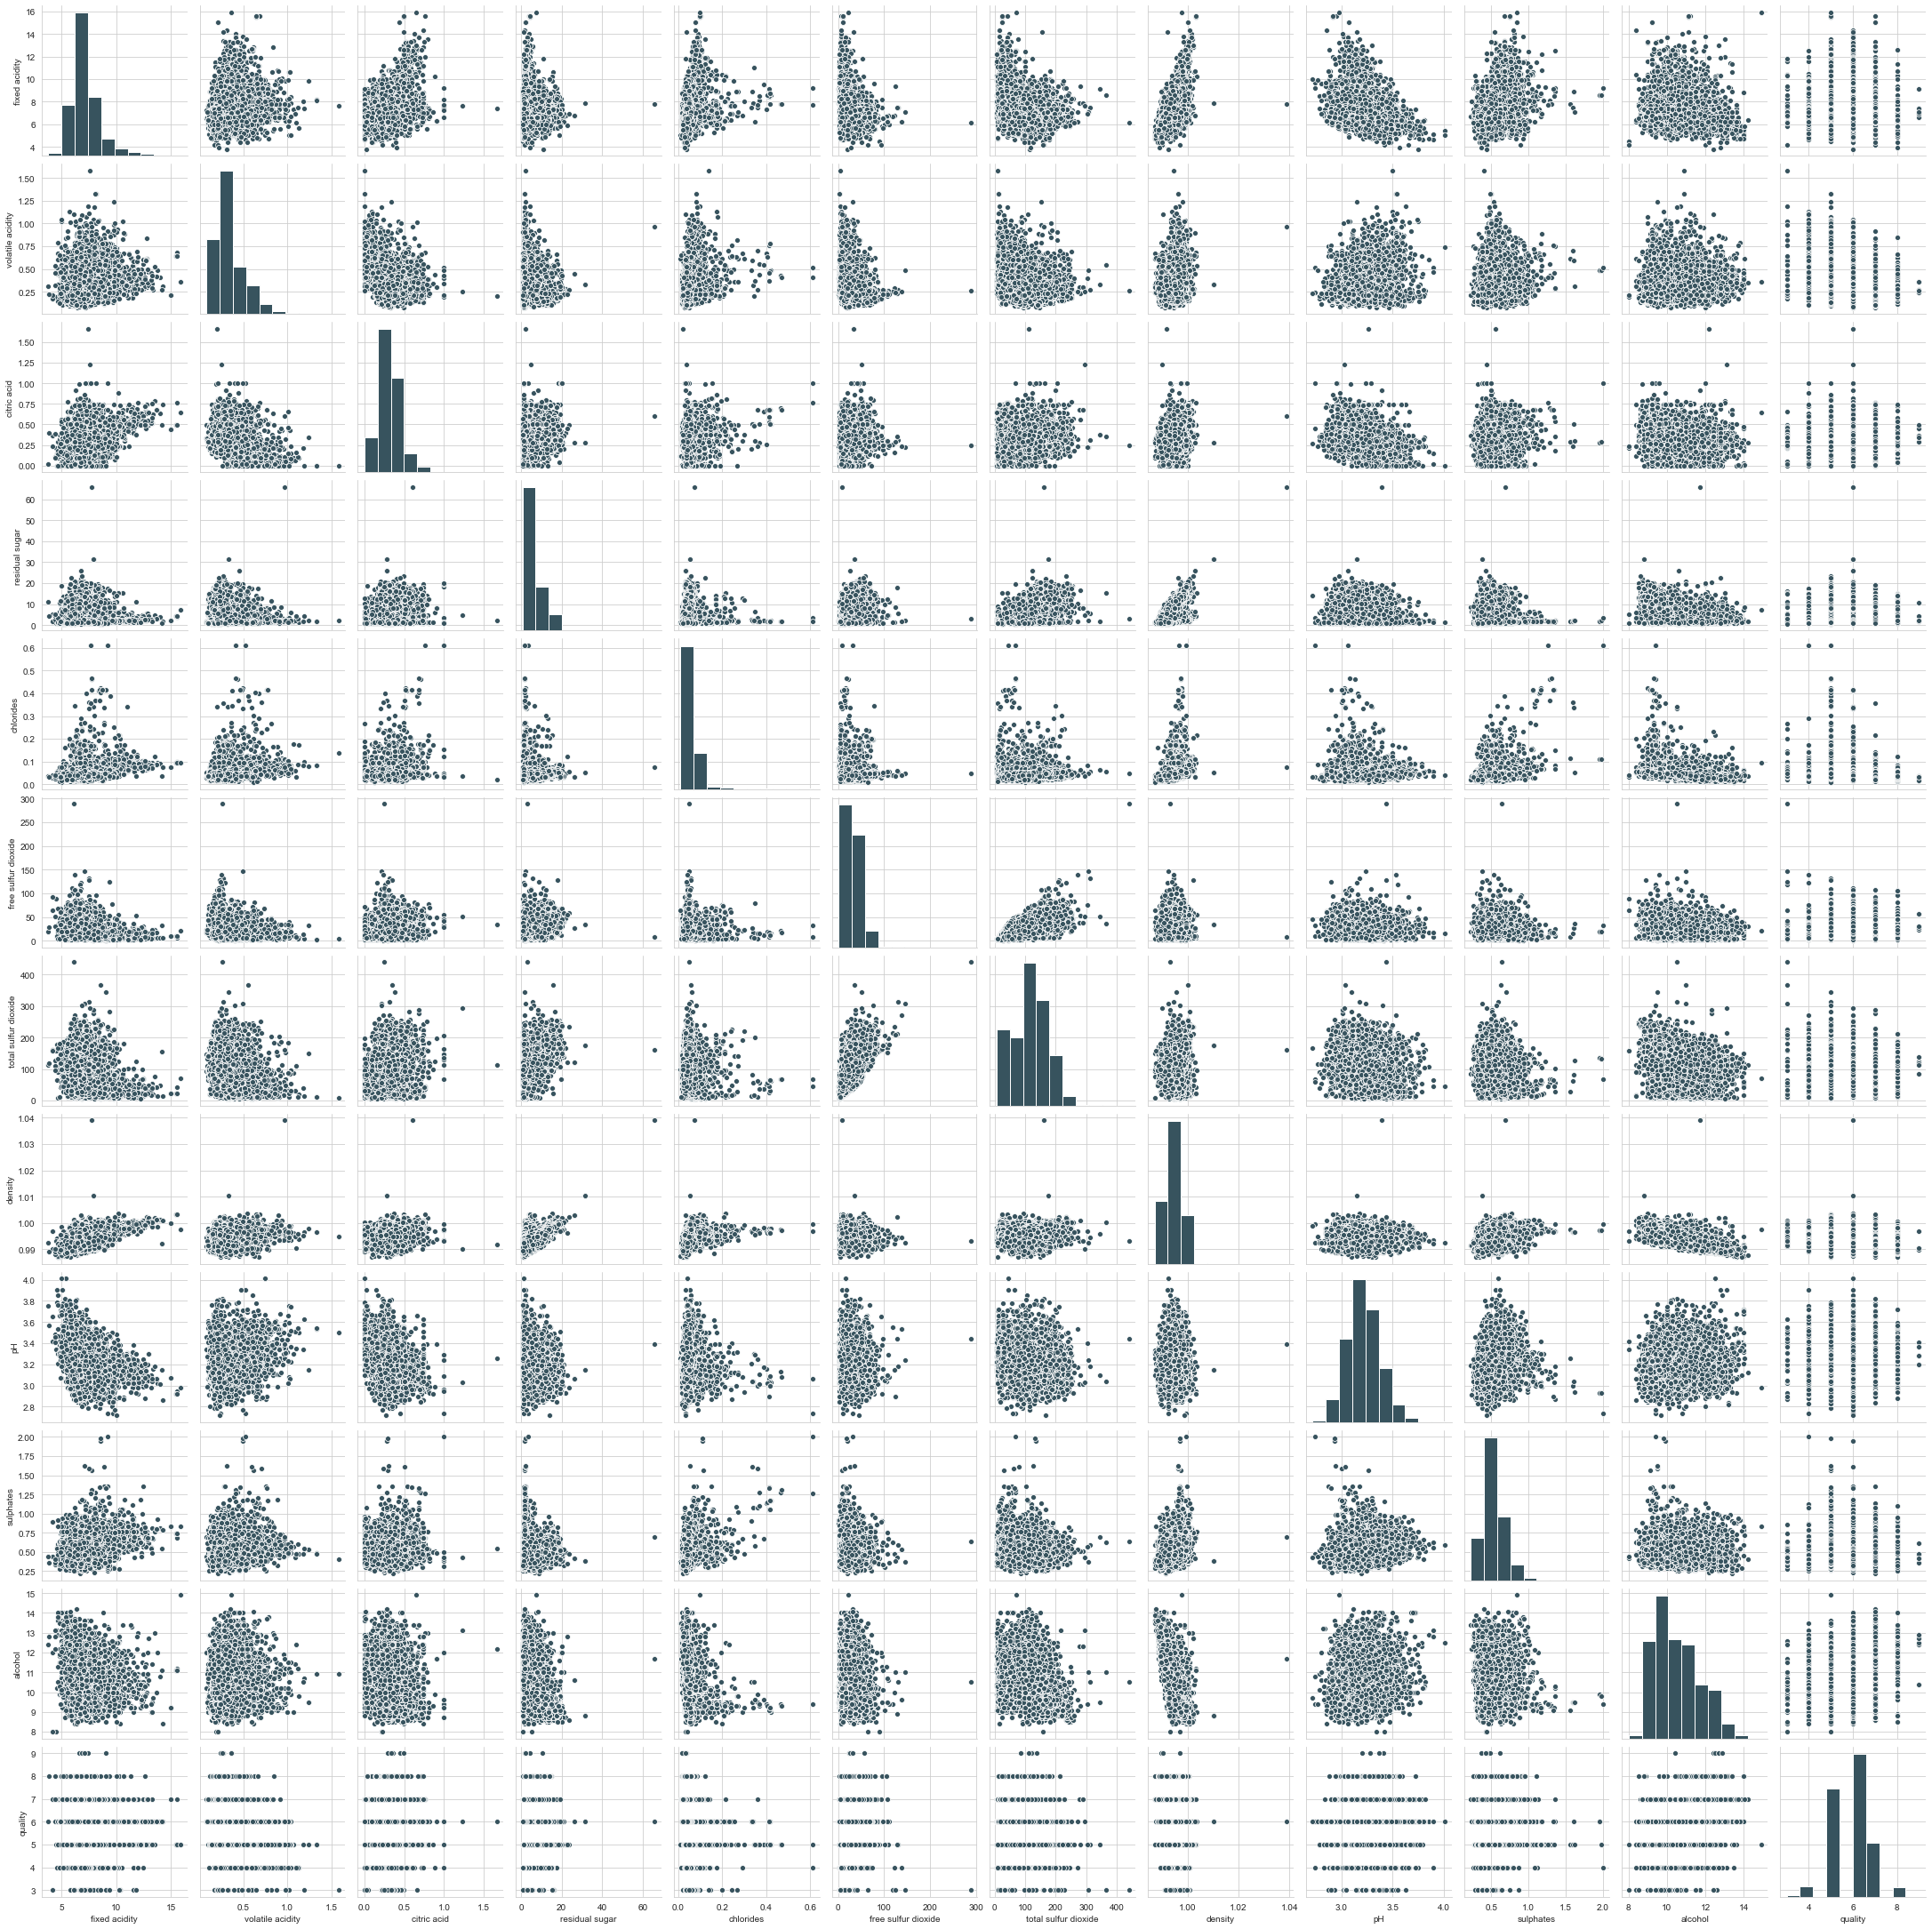

In [98]:
sns.pairplot(wine)

### 2. Set Target Variable

Create a target variable for wine quality.

In [116]:
# Target Variable
y=wine['quality']

### 3. Set Predictor Variables

Create a predictor matrix with variables of your choice. State your reason.

In [117]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [118]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


In [119]:
# ANSWER
X = wine[['alcohol','citric acid','free sulfur dioxide','pH', 'sulphates']]

As per the heatmap insight it reveals that there is a correlation between the alcohol and the quality.
And also its noticed that the quality has negative corellations with fixed acidity,volatile acidity,residual sugar,total sulphur dioxide & density which means that there will be no impact on changes in the quality variations.


### 4. Using Linear Regression Create a Model and Test Score

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [121]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [122]:
# Create a model for Linear Regression
lm = LinearRegression() 
# Fit the model with the Training data
model = lm.fit(X_train,y_train)
# Calculate the score (R^2 for Regression) for Training Data
print("Model Score of Train Data",model.score(X_train,y_train))
# Calculate the score (R^2 for Regression) for Testing Data
print("Model Score of Test Data",model.score(X_test,y_test))

Model Score of Train Data 0.23217522897936582
Model Score of Test Data 0.19570435116352247


In [123]:
model.intercept_

1.6240136369879377

In [124]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
alcohol,0.351584
citric acid,0.379893
free sulfur dioxide,0.007726
pH,-0.026641
sulphates,0.437869


In [125]:
predictions = lm.predict(X_test)

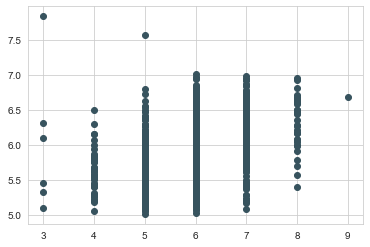

In [126]:
plt.scatter(y_test,predictions)
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

### BONUS: Cross validation

In [127]:
# Cross validation 
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error

In [128]:
# Set up 5-fold cross validation  
k_fold = KFold(5, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):
    
    # Get training and test sets for X and y
    X_train = X.iloc[train, ]
    y_train = y.iloc[train, ]
    X_test = X.iloc[test, ]
    y_test = y.iloc[test, ]
    
    # Fit model with training set
    lm.fit(X_train, y_train)
    
    # Make predictions with training and test set
    train_predictions = lm.predict(X_train)
    test_predictions = lm.predict(X_test)
    
    # Score R2 and RMSE on training and test sets and store in list
    train_scores.append(lm.score(X_train, y_train))
    test_scores.append(lm.score(X_test, y_test))
    
    train_rmse.append(mean_squared_error(y_train, train_predictions, squared=False))
    test_rmse.append(mean_squared_error(y_test, test_predictions, squared=False))

# Create a metrics_df dataframe to display r2 and rmse scores
metrics_df = pd.DataFrame({'Training R2': train_scores, 
                           'Test R2': test_scores, 
                           'Training RMSE': train_rmse, 
                           'Test RMSE': test_rmse},
                          index=[i+1 for i in range(5)])

metrics_df

,Training R2,Test R2,Training RMSE,Test RMSE
1,0.234687,0.188728,0.760124,0.801500
2,0.215641,0.266418,0.777905,0.729881
3,0.226519,0.220473,0.768612,0.768259
4,0.222613,0.233008,0.766331,0.778190
5,0.228966,0.210574,0.768774,0.767494


In [130]:
# Describe the metrics
metrics_df.describe()

,Training R2,Test R2,Training RMSE,Test RMSE
count,5.000000,5.000000,5.000000,5.000000
mean,0.225685,0.223840,0.768349,0.769065
std,0.007121,0.028797,0.006389,0.025854
min,0.215641,0.188728,0.760124,0.729881
25%,0.222613,0.210574,0.766331,0.767494
50%,0.226519,0.220473,0.768612,0.768259
75%,0.228966,0.233008,0.768774,0.778190
max,0.234687,0.266418,0.777905,0.801500


### 5. Feature Selection

What's your score (R^2 for Regression) for Testing Data? 

How many feature have you selected? Can you improve your score by selecting different features?

The mean value of Test R2 : 0.223840..
It is a poor score.This means that there is a less variation in y with respect to change in X.  
By looking at the correlation matrix itself proves that the quality is only correlates with the alcohol.
Even when u add different feautures there will be less impact on the r2.

**Please continue with Lab 4.2.2 with the same dataset.**



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



